**1**. (100 points)

Implement the Drossel and Schwabl forest fire model using the [description](https://en.wikipedia.org/wiki/Forest-fire_model#/media/File:Forest_fire_model.gif) from Wikipedia

```
The model is defined as a cellular automaton on a grid with Ld cells. L is the sidelength of the grid and d is its dimension. A cell can be empty, occupied by a tree, or burning. The model of Drossel and Schwabl (1992) is defined by four rules which are executed simultaneously:
A burning cell turns into an empty cell
A tree will burn if at least one neighbor is burning
A tree ignites with probability f even if no neighbor is burning
An empty space fills with a tree with probability p
```

- Parameters for the simulation are
```python
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps
```
- You need to write code create an array named `sim` with shape (steps, n, n)
- **Note**: Your code should make use of `numpy` optimizations as much as possible - the simulation itself takes less than a second to complete on my fairly old desktop
- Now create a plot as shown from the `sims` array
![](./forest_fire.png)
- Code to display an animation of the `sims` array is provided
- Your animation should be similar to the one shown

Hints:

- For simplicity, assume that the borders of the simulation grid are fixed so they are always empty (the borders are *outside* the 100 by 100 grid you are saving at each step.
- Use marginalization to get the required numbers for the plot of population sizes over time
- Use *views* liberally - they do not incur the cost of a copy


In [22]:
import matplotlib.pyplot as plt


In [23]:
from IPython.display import Video

Video("forest_fire.mp4")

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
np.random.seed(123)

In [29]:
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps

In [30]:
EMPTY, TREE, BURN = 0, 1, 2

In [31]:
steps = 200  # Number of steps
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps

In [34]:
%%time


# Your code to generate the `sim` array here.


#create update function
def transf(land):
    '''
    The function is used to update the cells' status in land.A cell can be empty, occupied by a tree, or burning. 
    
    The updating rule:
    A burning cell turns into an empty cell
    A tree will burn if at least one neighbor is burning
    A tree ignites with probability f even if no neighbor is burning
    An empty space fills with a tree with probability p
    
    Input arguement is original land, then this function will return a new land'''   

    #create a new land
    land1=land.copy()
    #get the neighbor burning number of each cell (200*200 grid)
    N=np.zeros((n+2,n+2),dtype=int)
    N[1:-1,1:-1]=(np.where(land[:-2,:-2]==BURN,1,0)+np.where(land[:-2,1:-1]==BURN,1,0)+np.where(land[:-2,2:]==BURN,1,0)+np.where(land[1:-1,:-2]==BURN,1,0)+ np.where(land[1:-1,2:]==BURN,1,0)+np.where(land[2:,:-2]==BURN,1,0)+np.where(land[2:,1:-1]==BURN,1,0)+np.where(land[2:,2:]==BURN,1,0))
    #create empty-->tree and tree-->burn probability matrix
    TREEpro=np.random.rand(n+2,n+2)
    BURNpro=np.random.rand(n+2,n+2)
    #apply rules to update status
    TREEid=((land==EMPTY)&(TREEpro<=p))|((land==TREE)&(BURNpro>f)&(N==0))
    EMPTYid=(land==BURN)|((land==EMPTY)&(TREEpro>p))
    BURNid=((land==TREE)&((BURNpro<=f)|N>0))
    #update original land to new land
    land1[TREEid]=TREE
    land1[EMPTYid]=EMPTY
    land1[BURNid]=BURN
    land1[0,:]=EMPTY
    land1[-1,:]=EMPTY
    land1[:,0]=EMPTY
    land1[:,-1]=EMPTY
    return land1

#use function to update land
sim=np.zeros((steps,n+2,n+2),dtype=int)
for i in range(1,steps):sim[i]=transf(sim[i-1])
sim=sim[:,1:-1,1:-1]
tree=np.sum(np.where(sim==TREE,1,0),axis=(1,2))
empty=np.sum(np.where(sim==EMPTY,1,0),axis=(1,2))
burn=np.sum(np.where(sim==BURN,1,0),axis=(1,2))

CPU times: user 792 ms, sys: 144 ms, total: 936 ms
Wall time: 935 ms


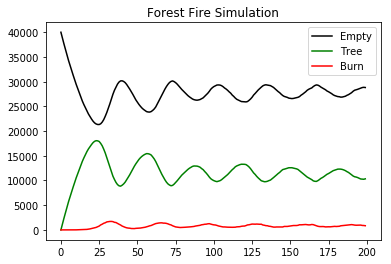

In [35]:
import matplotlib.pyplot as plt
for x,c,l in zip([empty,tree,burn],['black','green','red'],['Empty','Tree','Burn']):
    plt.plot(x,color=c,label=l)
    plt.legend(loc='upper right')
    plt.title('Forest Fire Simulation')

# Check movie

If your `sim` array is correct, the animation will play upon execution. It takes a bit of time (< 1 minute) to genreate the animation and render to HTML.

In [36]:
%%capture

fig = plt.figure(figsize=(6,6))
im = plt.imshow(sim[0], cmap=ListedColormap(['black', 'green', 'red']), vmin=0, vmax=2)

def updatefig(j):
    im.set_array(sim[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=range(steps), 
                              interval=50, blit=True);

In [37]:
%%time
HTML(ani.to_jshtml())

CPU times: user 28.9 s, sys: 27.7 s, total: 56.6 s
Wall time: 18.9 s


To write to file if you have ffmpeg instaled

```python 
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('forest_fire.mp4', writer=writer)
```